In [2]:
import numpy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv(r'C:\Users\hp\Data Science\archive\Hackathon_Validation_Data.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(2430, 4)

In [6]:
df.head(100)

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS
...,...,...,...,...
95,1112915,N1,M2,BUTTER MARGR (4/94)
96,1112919,N1,M2,CHEESE (4/94)
97,1112923,N1,M2,CHOCOLATE
98,1112927,N1,M2,CHYAVANPRASH


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2430 non-null   int64 
 1   STORECODE  2430 non-null   object
 2   MONTH      2430 non-null   object
 3   GRP        2430 non-null   object
dtypes: int64(1), object(3)
memory usage: 76.1+ KB


In [8]:
  pd.isnull(df)

,ID,STORECODE,MONTH,GRP
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2425,False,False,False,False
2426,False,False,False,False
2427,False,False,False,False
2428,False,False,False,False


In [9]:
df.columns

Index(['ID', 'STORECODE', 'MONTH', 'GRP'], dtype='object')

In [10]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,ID
count,2.430000e+03
mean,1.117393e+06
std,2.806500e+03
min,1.112535e+06
25%,1.114964e+06
50%,1.117393e+06
75%,1.119822e+06
max,1.122251e+06


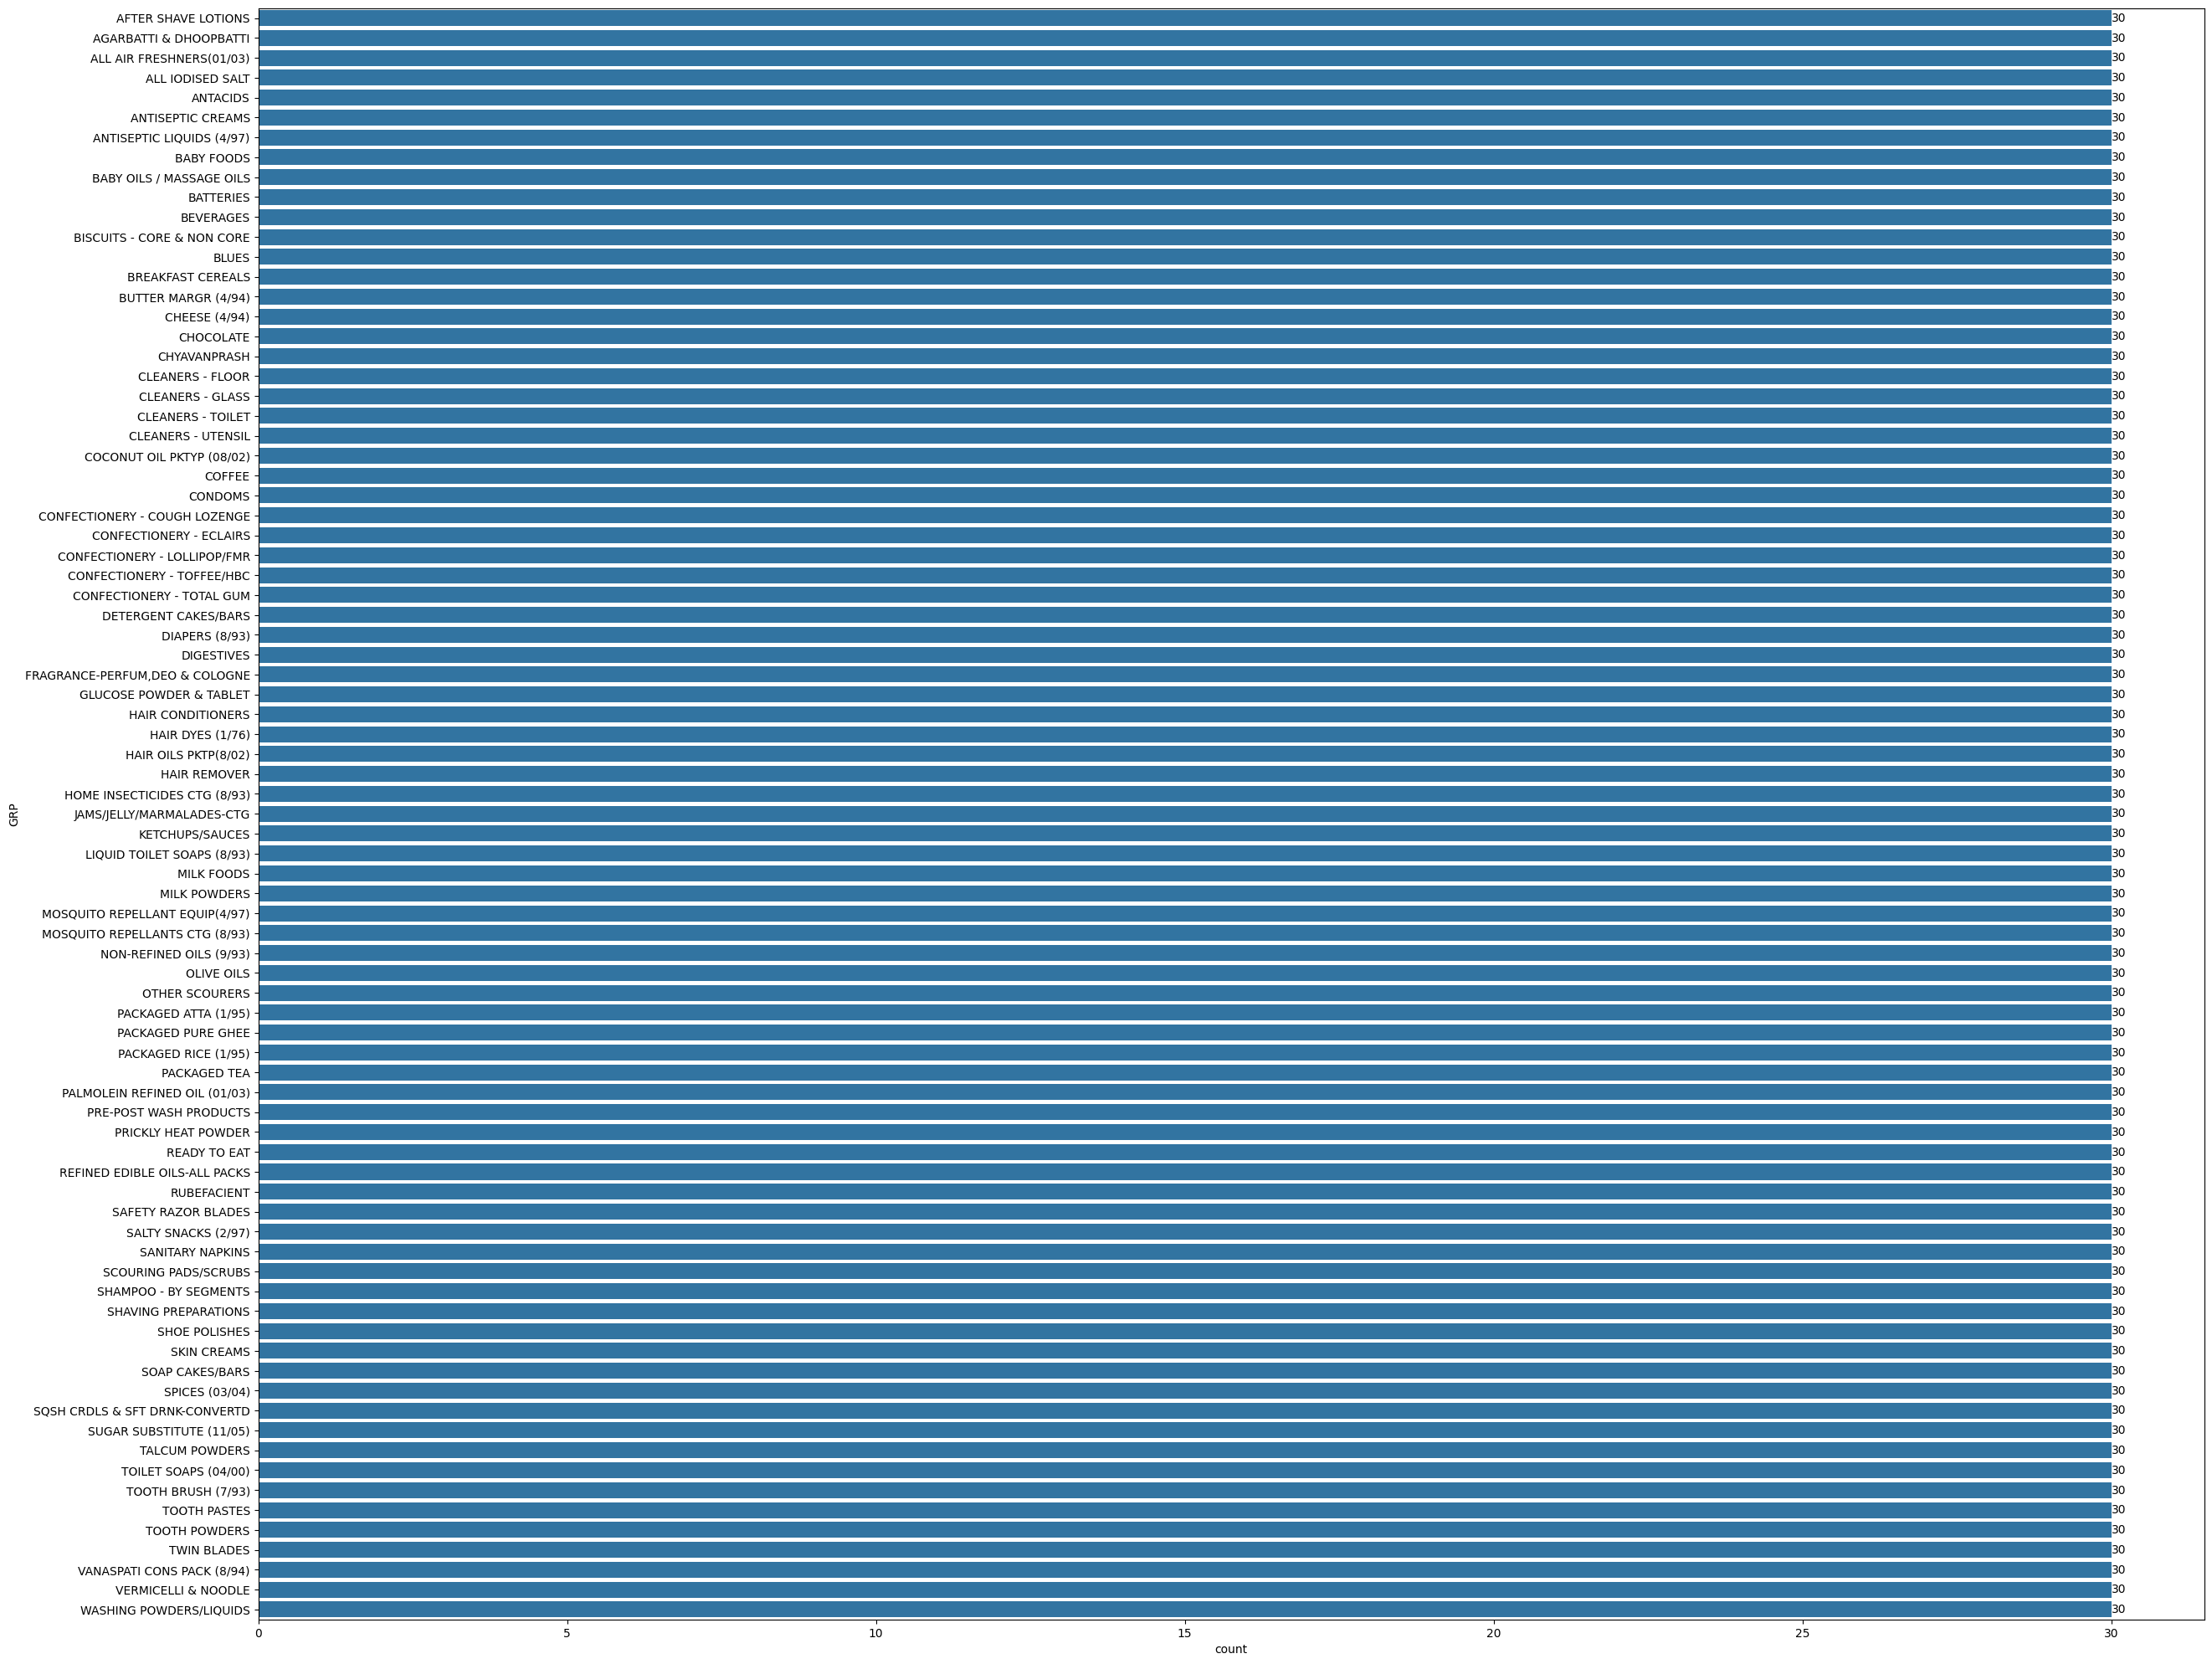

In [11]:
plt.figure(figsize=(30, 25))  # Adjust width and height as needed
ax = sns.countplot(y='GRP', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='MONTH', ylabel='ID'>

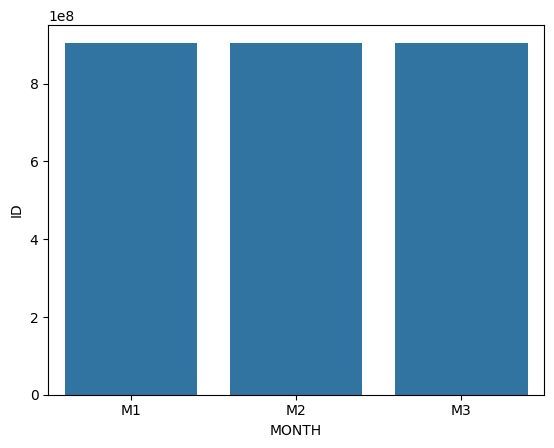

In [14]:
# Define the custom order of months
custom_order = ['M1', 'M2', 'M3']

# Convert the 'MONTH' column to categorical type with the custom order
df['MONTH'] = pd.Categorical(df['MONTH'], categories=custom_order, ordered=True)

# Group by 'MONTH' and sum the 'QTY' values
sales_gen = df.groupby('MONTH', as_index=False, observed=False)['ID'].sum().sort_values(by='ID', ascending=False)

# Plot the bar chart
sns.barplot(x='MONTH', y='ID', data=sales_gen)

<Axes: xlabel='ID', ylabel='GRP'>

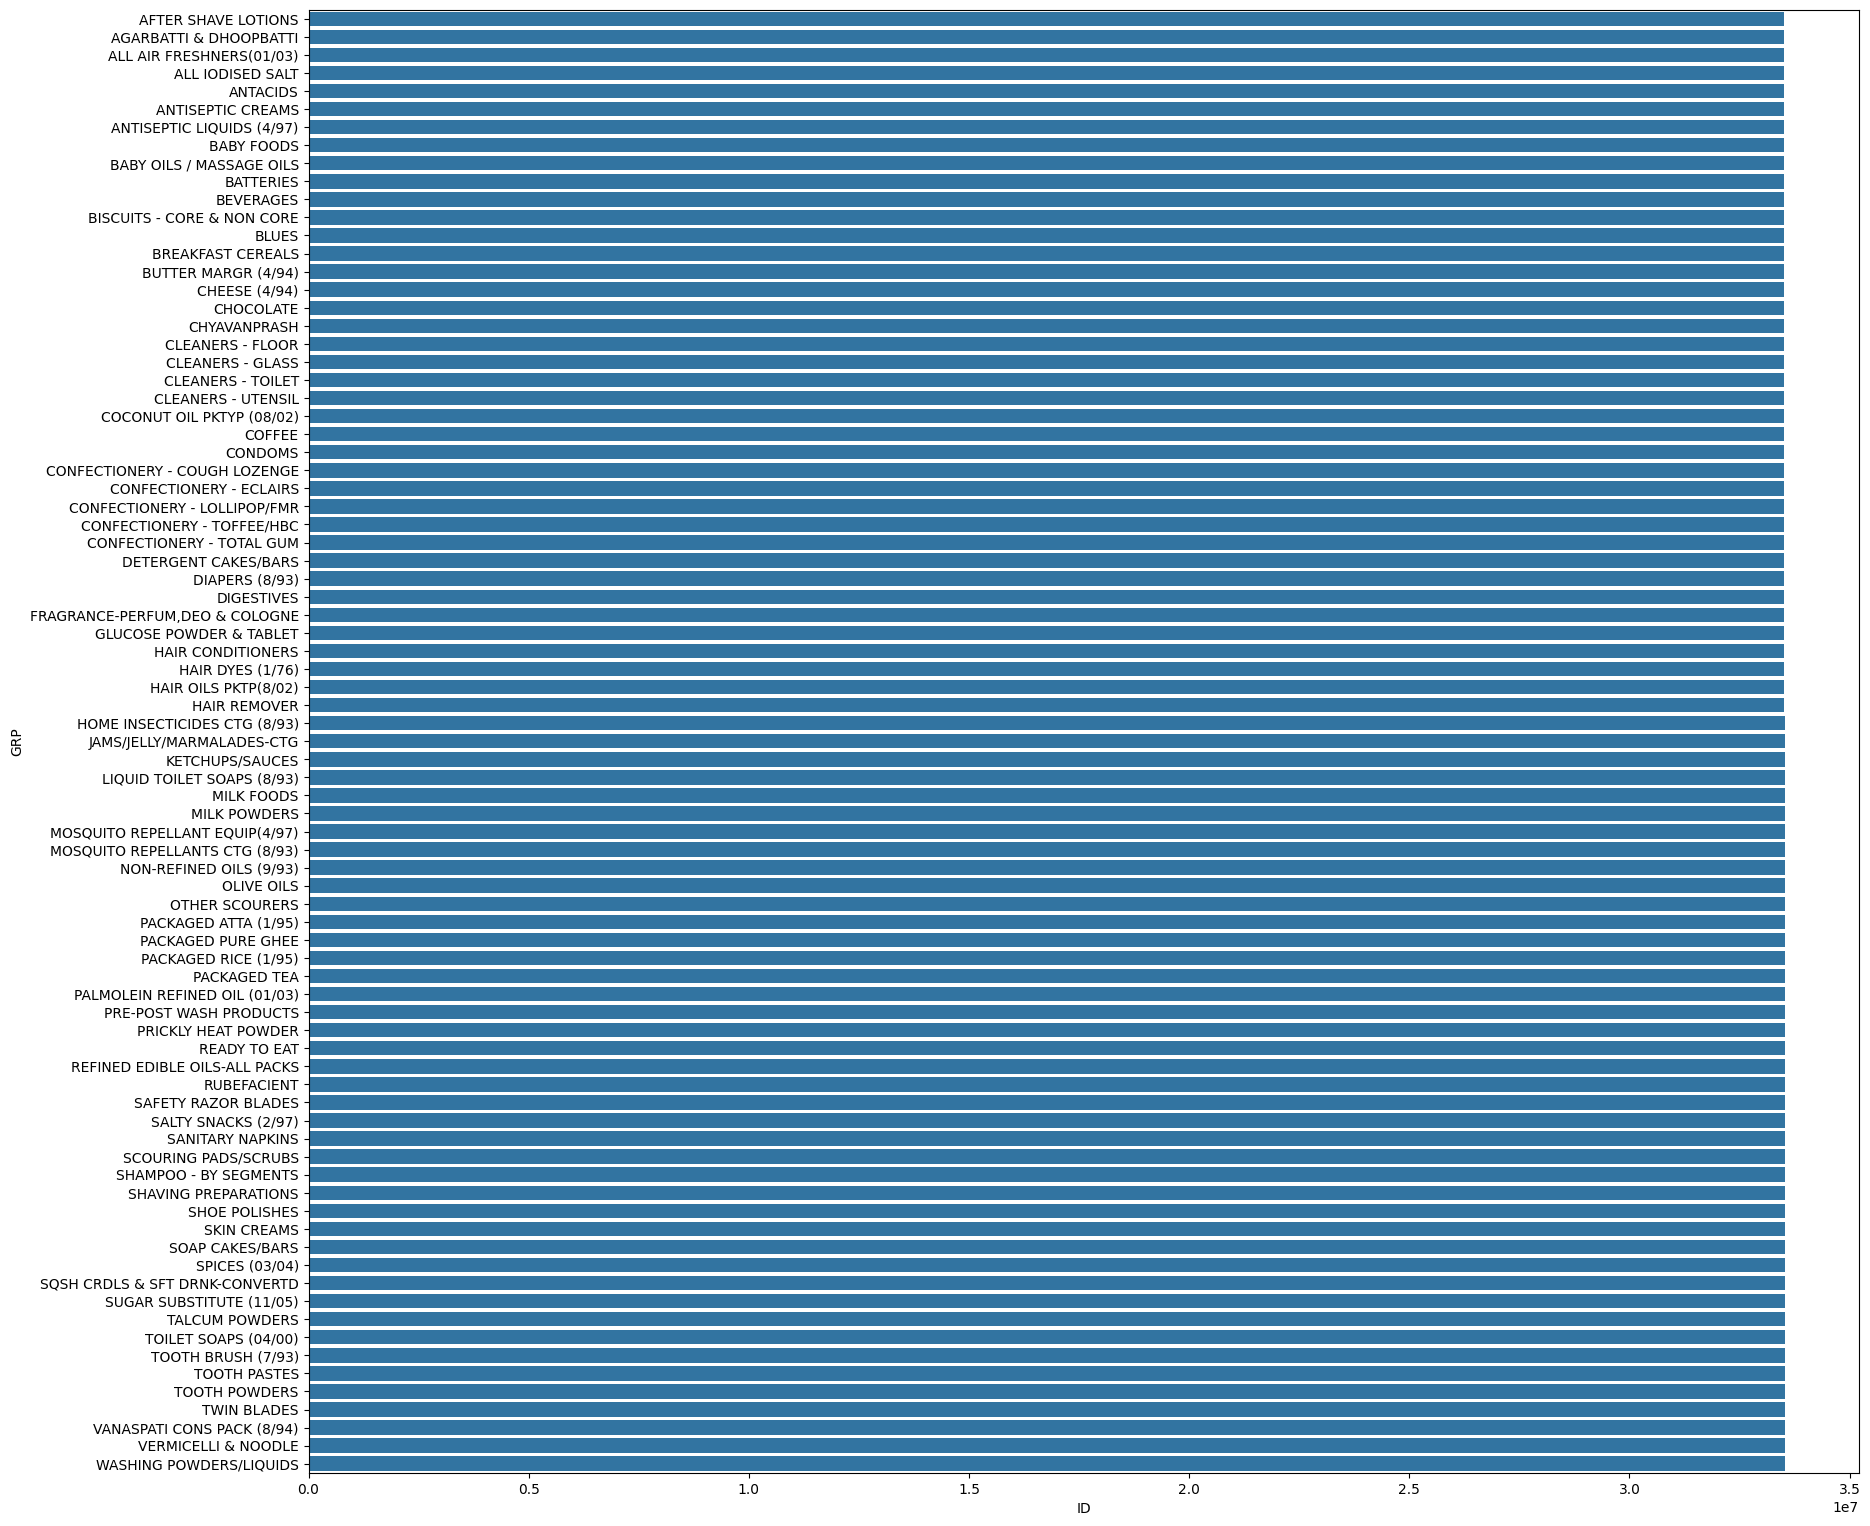

In [15]:
plt.figure(figsize=(20, 19))
a=df.groupby(['GRP'],as_index=False)['ID'].sum().sort_values(by='ID',ascending=True)
sns.barplot(x='ID',y='GRP',data=a)

<Axes: xlabel='ID', ylabel='STORECODE'>

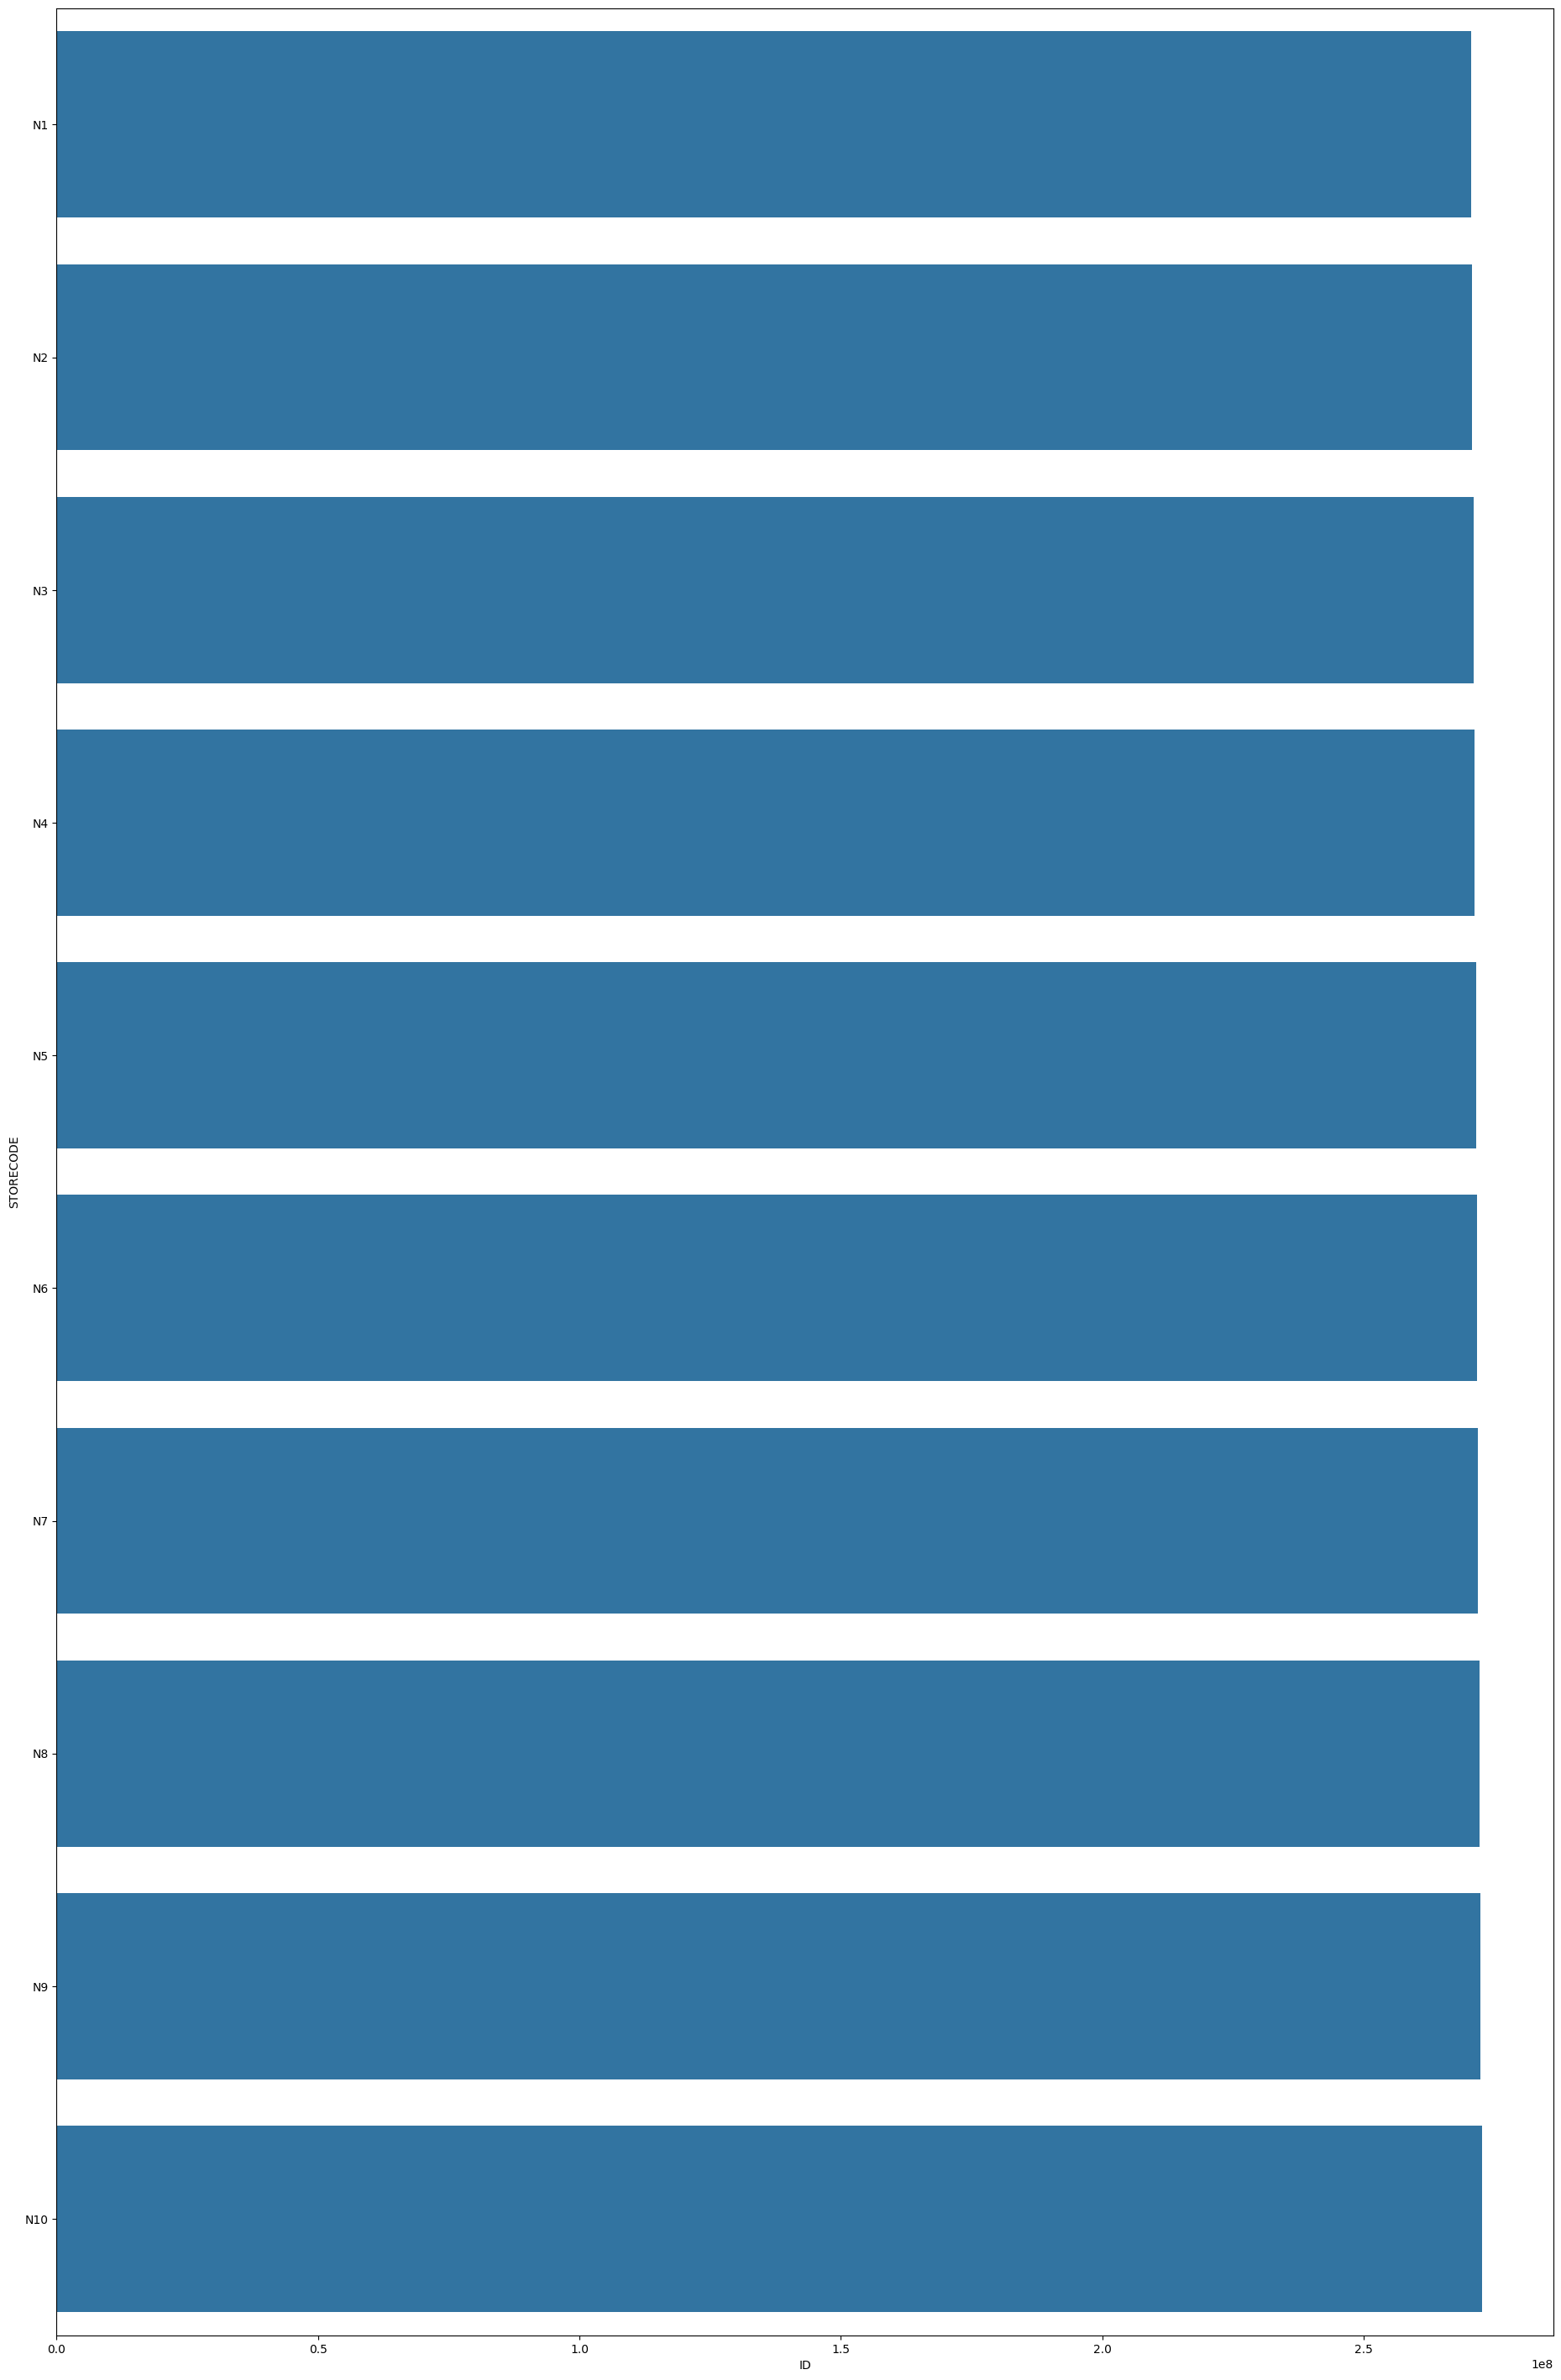

In [16]:
plt.figure(figsize=(23, 36))
a=df.groupby(['STORECODE'],as_index=False)['ID'].sum().sort_values(by='ID',ascending=True)
sns.barplot(x='ID',y='STORECODE',data=a)

C:\Users\hp\AppData\Local\Temp\ipykernel_21980\4073722815.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='MONTH', columns='GRP', values='ID', aggfunc='sum')


Text(0.5, 1.0, 'Stacked Bar Plot of Quantity by Month and Product Group (GRP)')

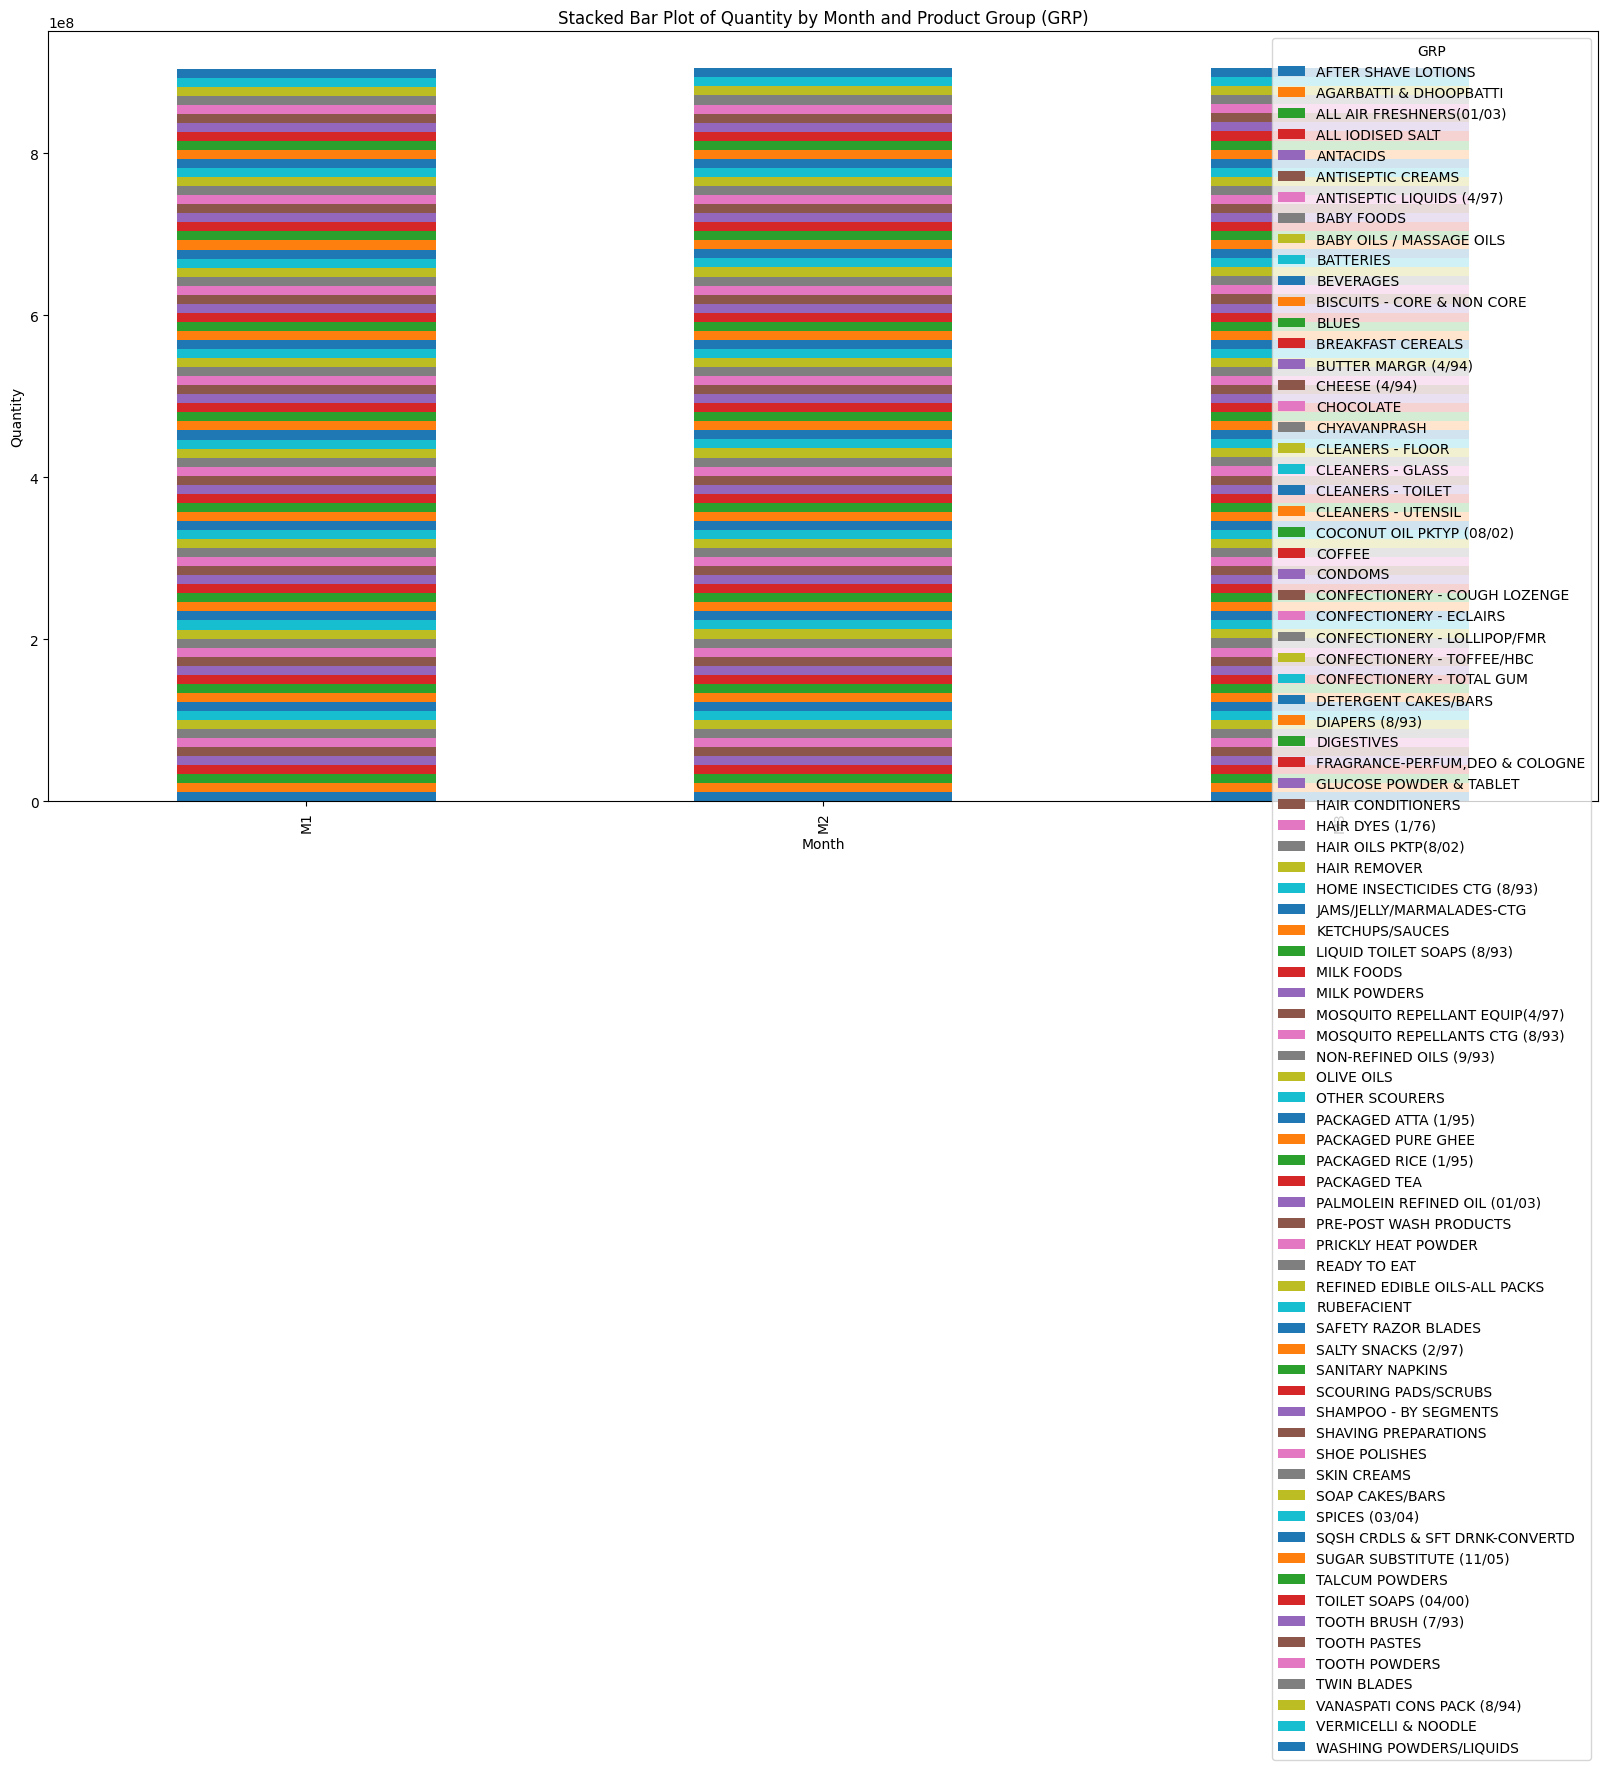

In [17]:
# Pivot the data
pivot_df = df.pivot_table(index='MONTH', columns='GRP', values='ID', aggfunc='sum')

# Plot the stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 10))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Stacked Bar Plot of Quantity by Month and Product Group (GRP)')

(-1.1, 1.1, -1.099999999999543, 1.0999999999995431)

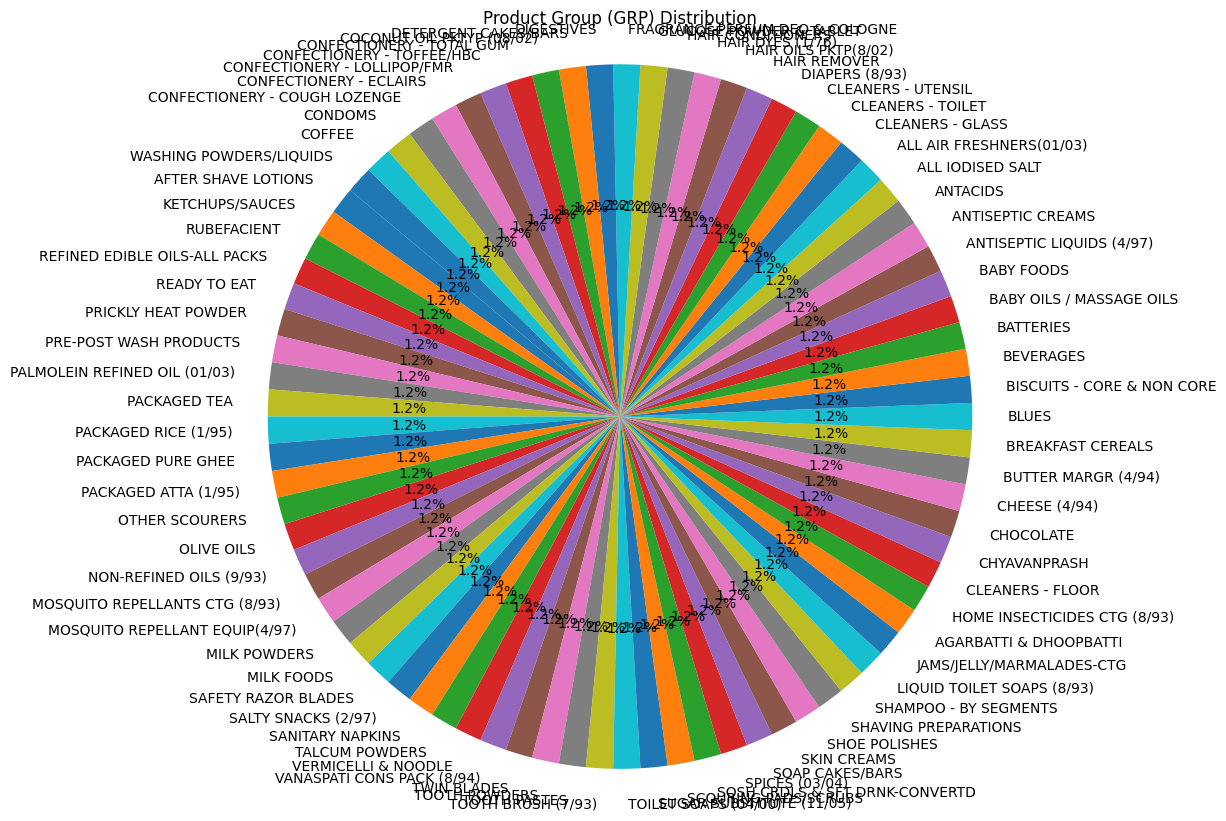

In [18]:
grp_counts = df['GRP'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(grp_counts, labels=grp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Group (GRP) Distribution')
plt.axis('equal')

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

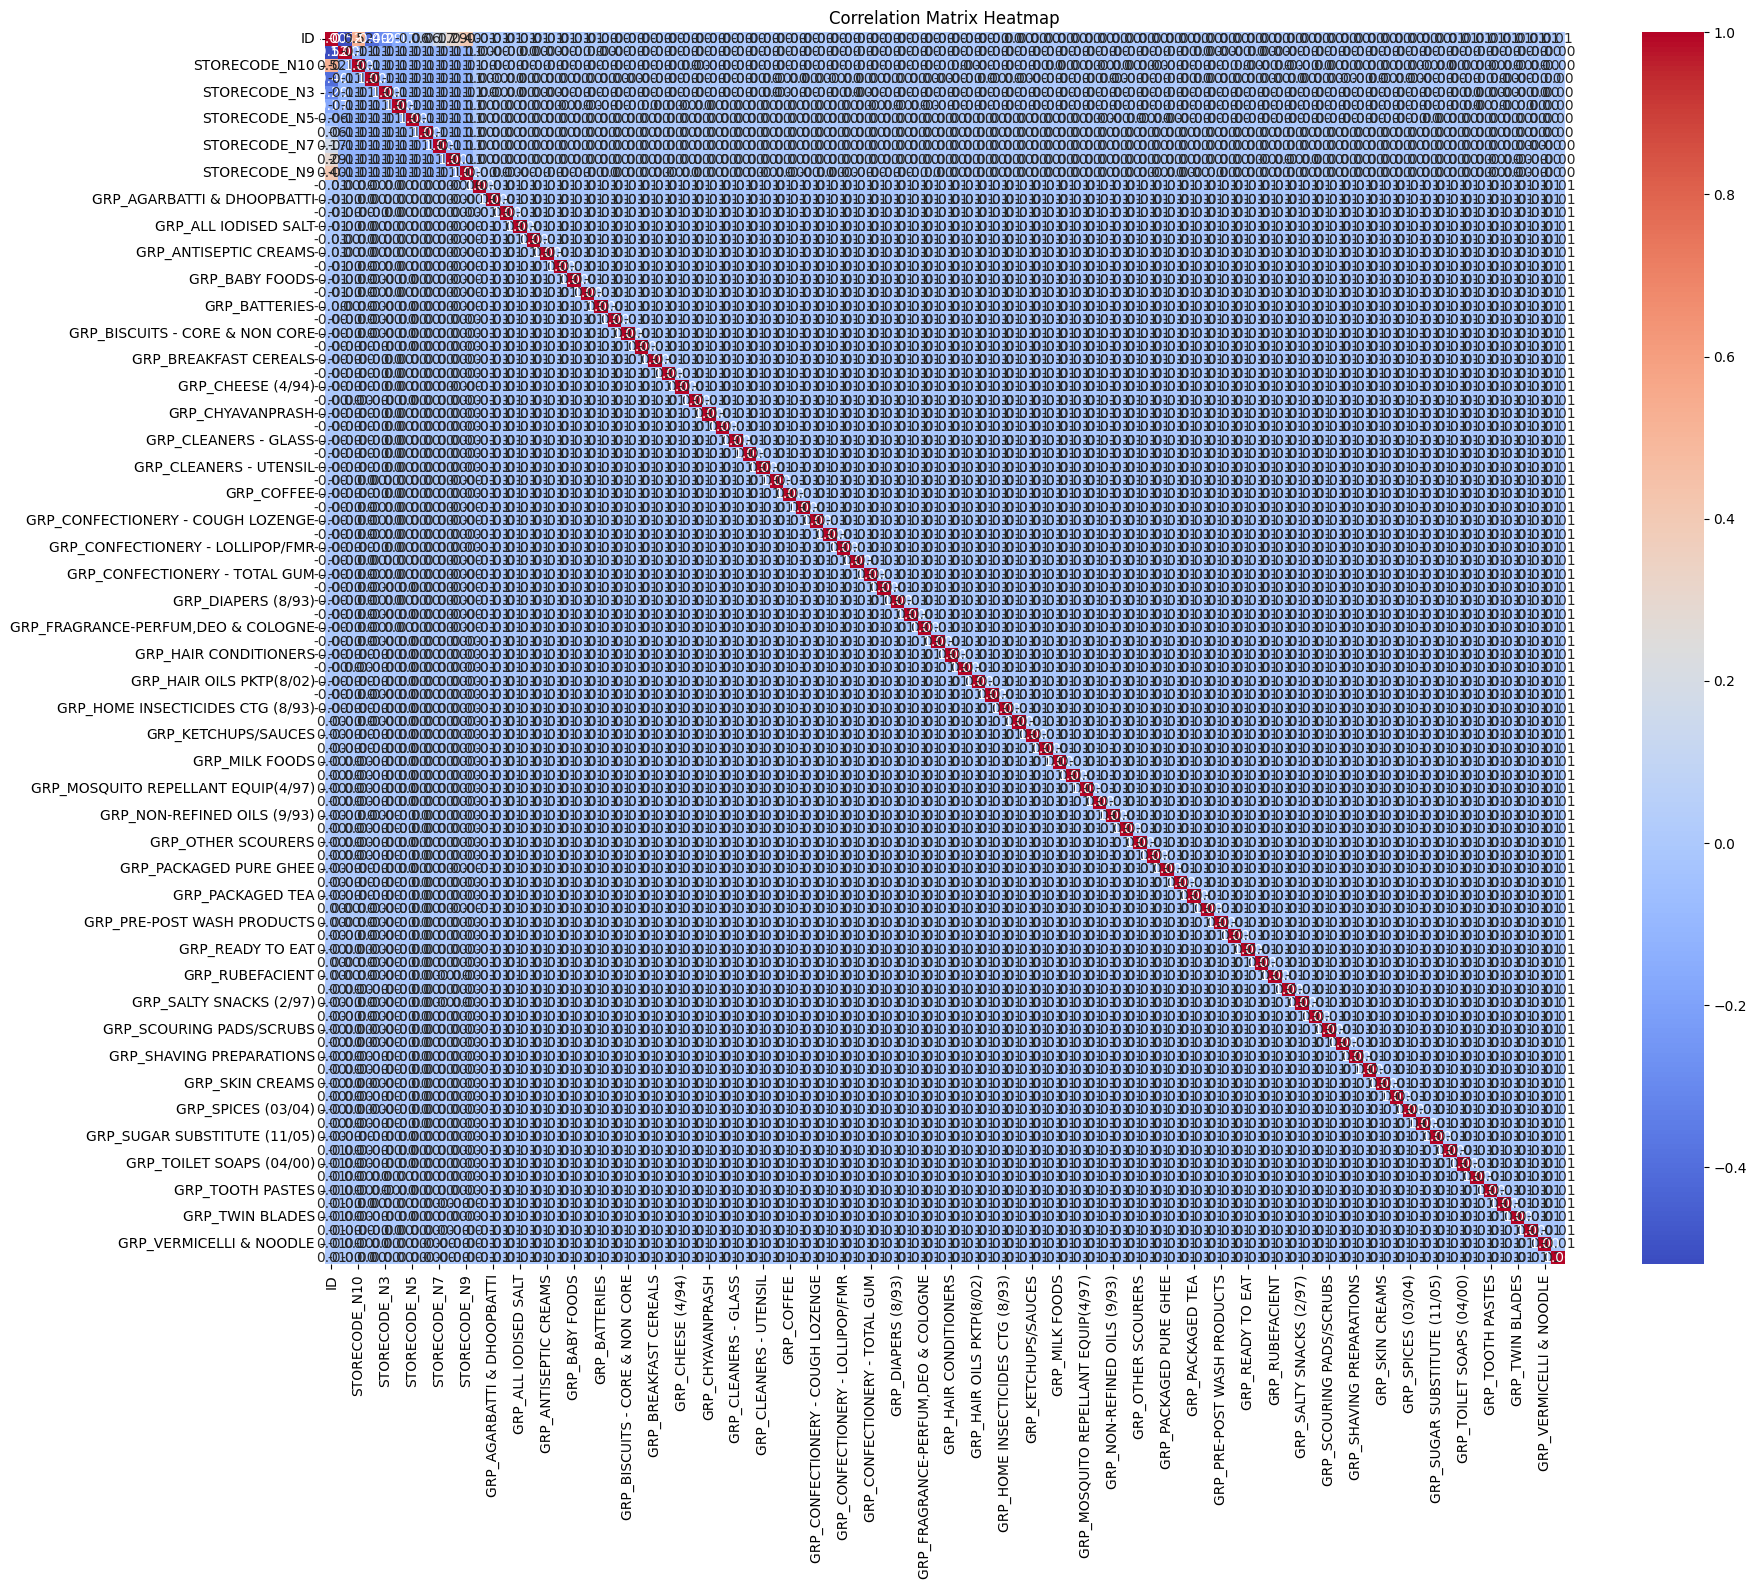

In [20]:
# Extract these columns for analysis
columns_of_interest = ['ID','STORECODE','GRP']
data_subset = df[columns_of_interest]

# One-hot encode categorical variables
data_subset = pd.get_dummies(data_subset, columns=['STORECODE','GRP'])

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

(-1.0999999572914088,
 1.0999999572914645,
 -1.0999999572914392,
 1.0999999572914951)

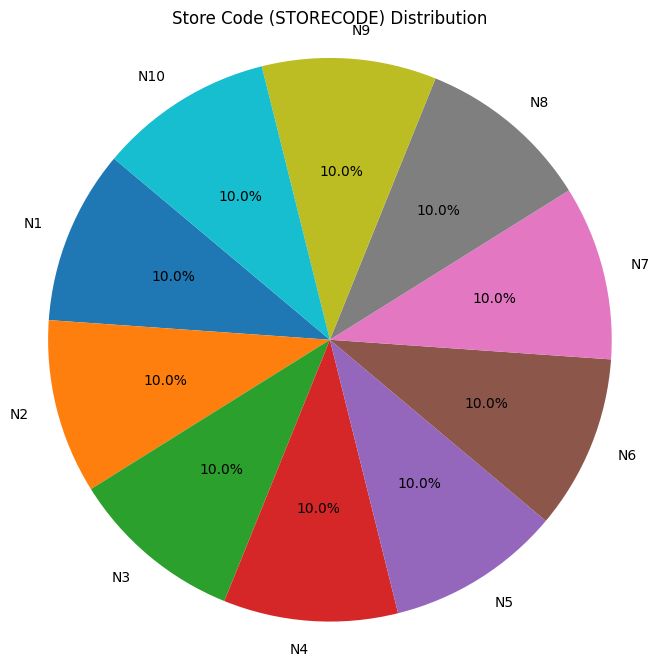

In [21]:
grp_counts = df['STORECODE'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grp_counts, labels=grp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Store Code (STORECODE) Distribution')
plt.axis('equal')

C:\Users\hp\AppData\Local\Temp\ipykernel_21980\2904760751.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=df.groupby(['MONTH'],as_index=False)['ID'].sum().sort_values(by='ID',ascending=True)


<Axes: xlabel='ID', ylabel='MONTH'>

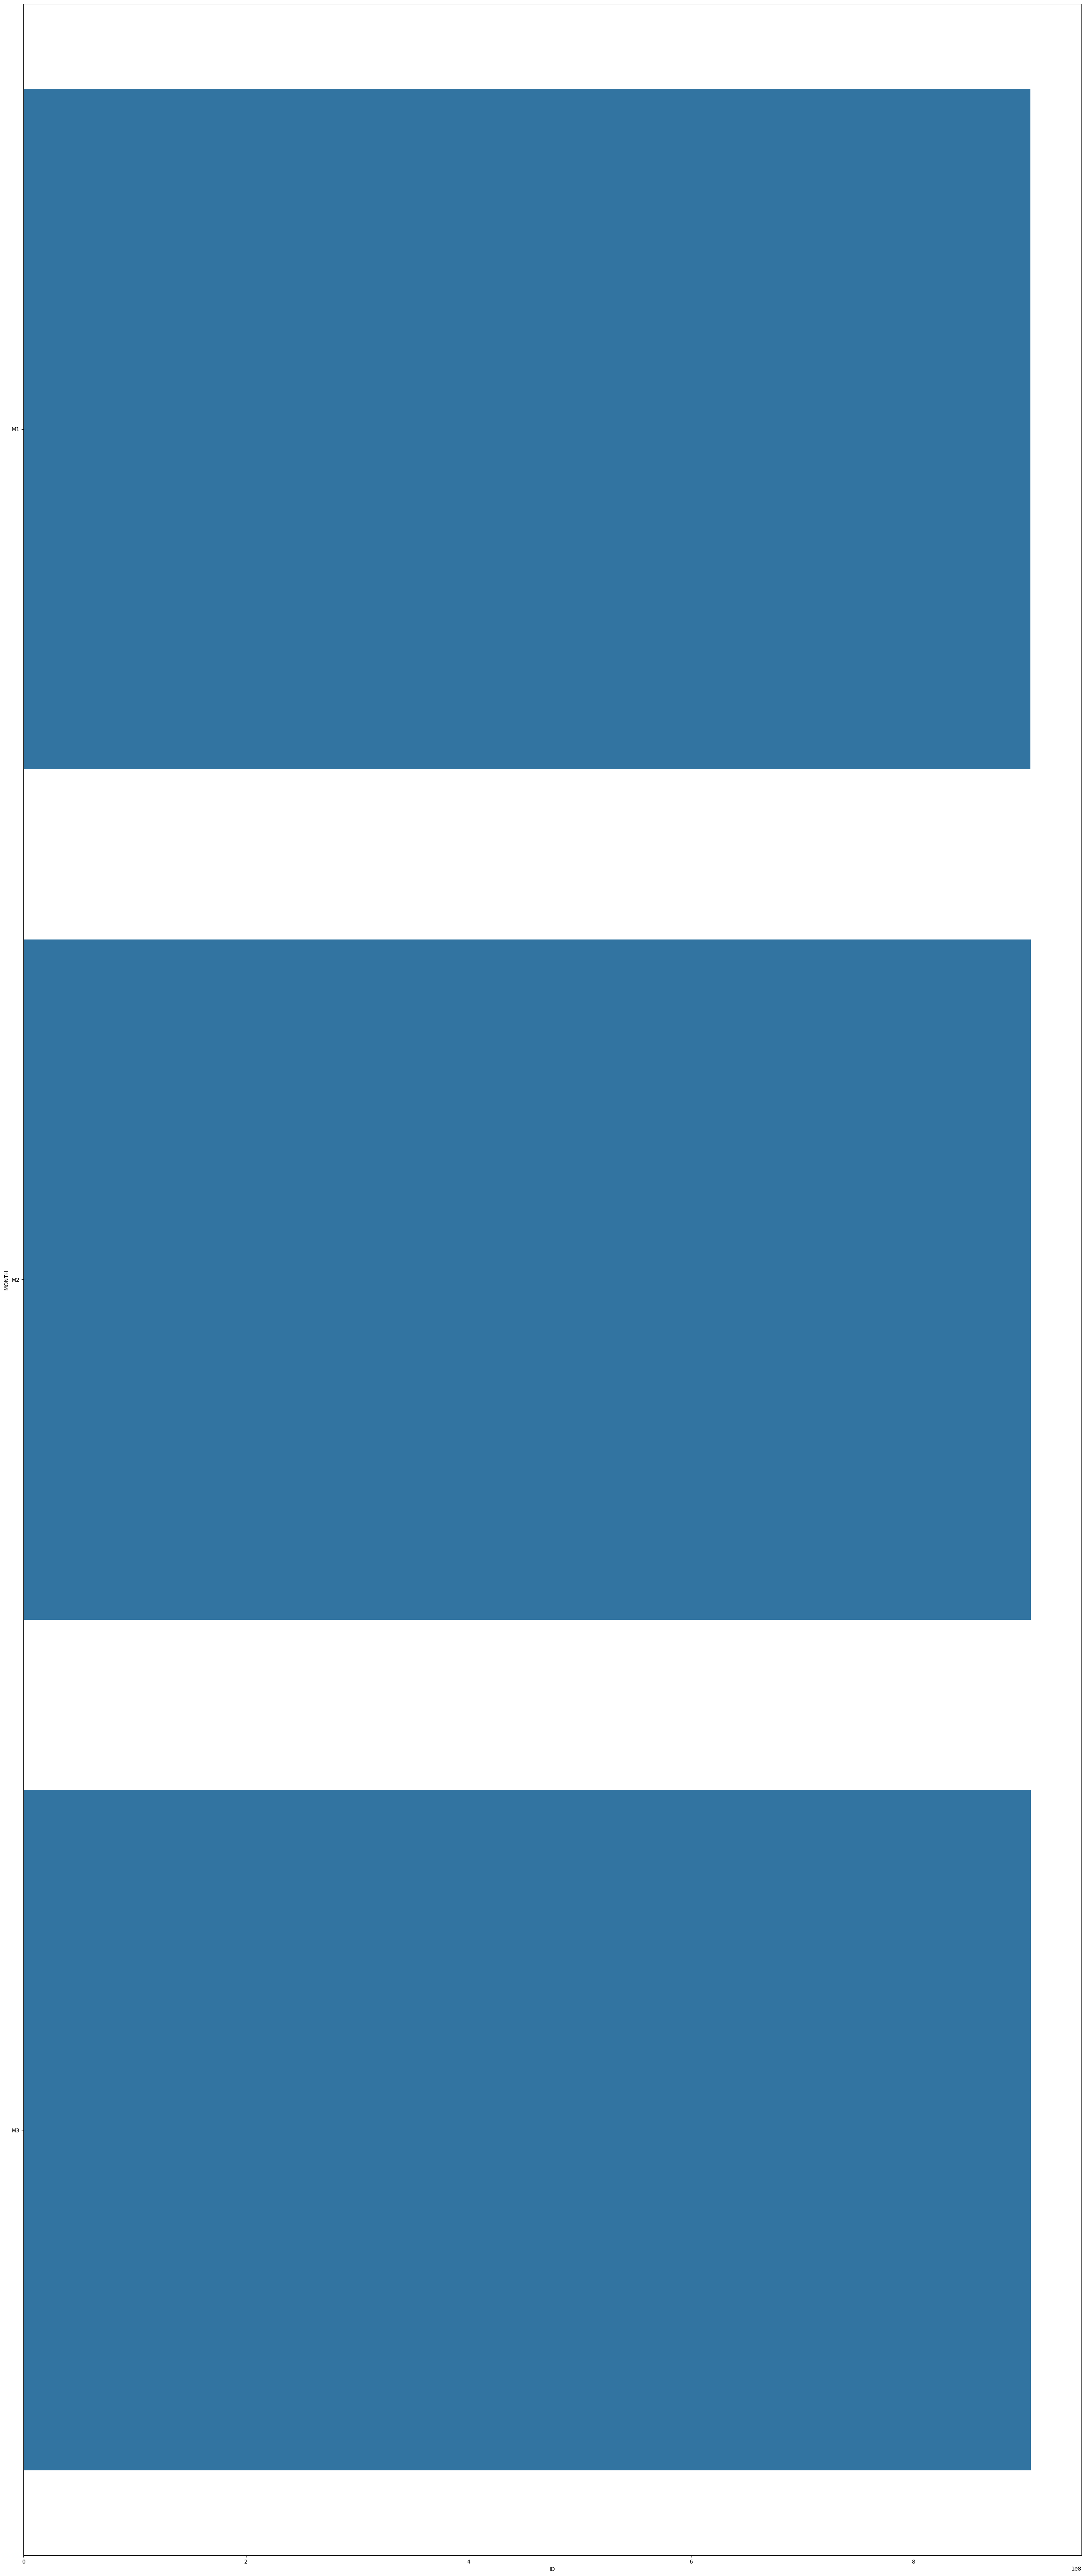

In [22]:
plt.figure(figsize=(35, 85))
a=df.groupby(['MONTH'],as_index=False)['ID'].sum().sort_values(by='ID',ascending=True)
sns.barplot(x='ID',y='MONTH',data=a)

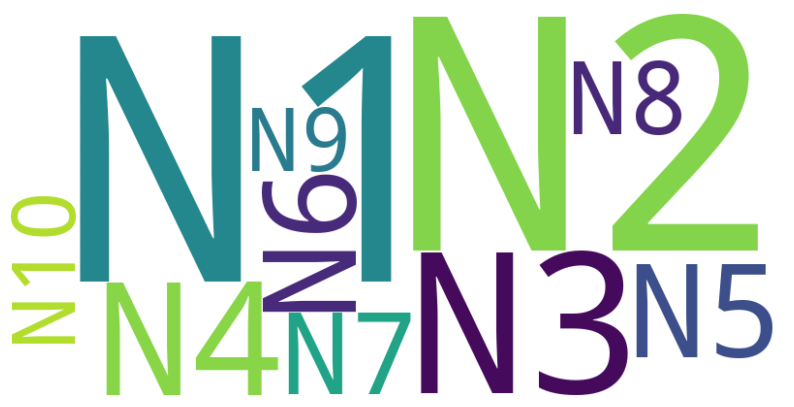

In [23]:
brand_counts = df['STORECODE'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brand_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

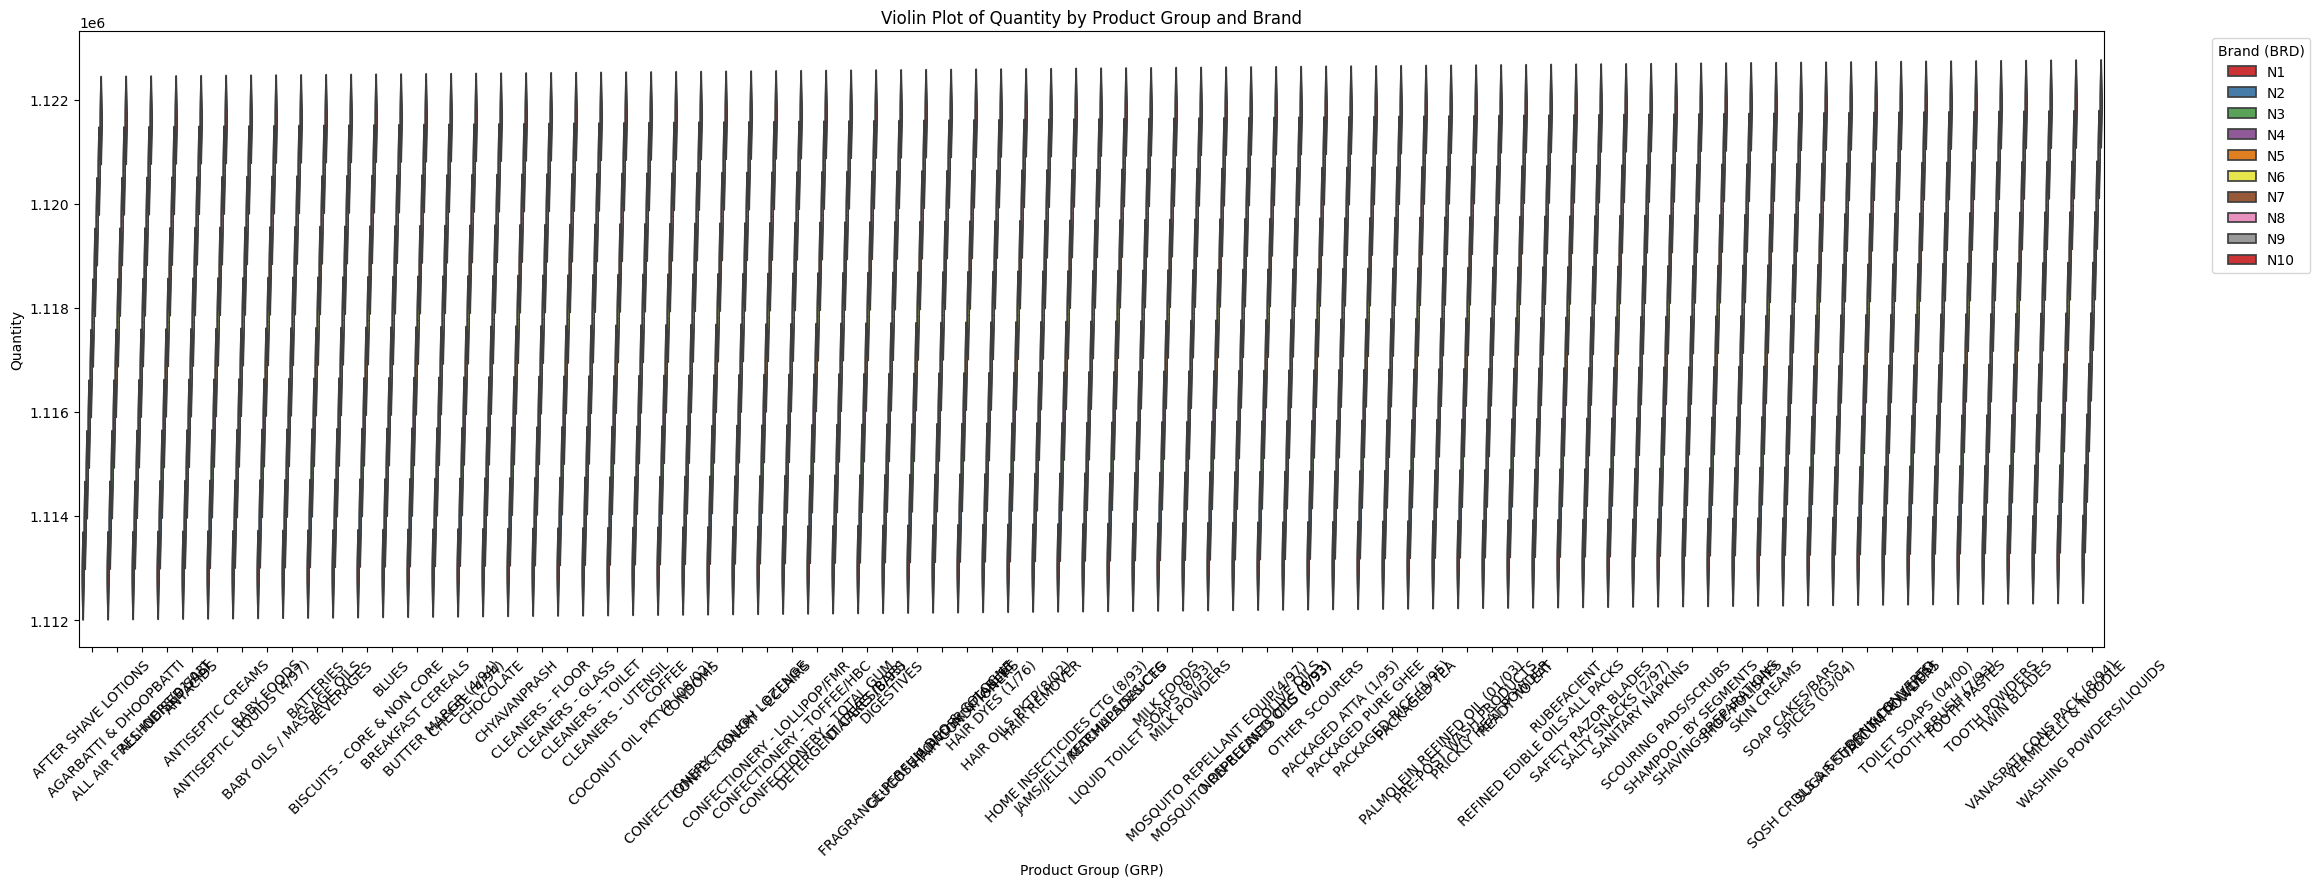

In [24]:
# Set up the plot
plt.figure(figsize=(30, 8))

# Create the violin plot
sns.violinplot(x='GRP', y='ID', hue='STORECODE', data=df, inner='stick', palette='Set1')

# Customize the plot
plt.title('Violin Plot of Quantity by Product Group and Brand')
plt.xlabel('Product Group (GRP)')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Brand (BRD)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.subplots_adjust(right=0.8)  # Increase the right margin to accommodate the legend

# Show the plot
plt.show()